<a href="https://colab.research.google.com/github/Yi-Wei-Lin/Tibame_ML_20210602/blob/main/%E3%80%8C0716_Cabbage_predict_shift_test%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [396]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [397]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [398]:
# data = pd.read_excel("Cabbage.xlsx")
data = pd.read_excel("/content/drive/MyDrive/市場批發交易歷史資料/Cabbage.xlsx")

In [399]:
data = data.dropna()
data = data.loc[data["Market"] == "台北一"]
np.array(data["Avg_price"]).reshape(-1,1)

array([[ 8.9],
       [ 7.2],
       [ 6.7],
       ...,
       [15.1],
       [15.1],
       [15.5]])

In [400]:
# data_train = data[data["Date"] < "2019-01-01"]
# data_test = data[data["Date"] >= "2019-01-01"]
data_train = data

In [401]:
data_train = data_train.drop(["Date","Market", "Product", "Month", "Week_day", "Year", "Rest_day"], axis=1)
data_train

,Up_price,Mid_price,Low_price,Avg_price,Volume
39204,11.0,8.0,5.0,8.9,192029.0
39205,9.0,7.0,4.0,7.2,174270.0
39206,8.0,6.0,3.0,6.7,125426.0
39207,10.0,7.0,4.0,7.1,119318.0
39208,9.0,7.0,5.0,6.8,118178.0
...,...,...,...,...,...
47037,23.0,15.6,6.2,15.2,174973.0
47038,27.4,21.4,13.6,21.0,128693.0
47041,21.8,15.0,8.5,15.1,96289.0
47042,21.9,15.2,8.1,15.1,148701.0


In [402]:
# from tensorflow.keras.utils import to_categorical
# pd.DataFrame(to_categorical(data_train["Month"]))
feature = data_train.shape[1]

In [403]:
# preparing label data
day = 3
Cabbage_shift = data_train.shift(-day)
label = Cabbage_shift['Avg_price']

# adjusting the shape of both
data_train = data_train.drop(data_train.index[len(data_train)-day:], axis=0)
label = label.drop(label.index[len(label)-day:], axis=0)

# conversion to numpy array
x, y = data_train.values, label.values

In [404]:
data_train.head(10)

,Up_price,Mid_price,Low_price,Avg_price,Volume
39204,11.0,8.0,5.0,8.9,192029.0
39205,9.0,7.0,4.0,7.2,174270.0
39206,8.0,6.0,3.0,6.7,125426.0
39207,10.0,7.0,4.0,7.1,119318.0
39208,9.0,7.0,5.0,6.8,118178.0
39209,9.0,7.0,4.0,7.3,120262.0
39210,9.0,7.0,5.0,7.2,165885.0
39212,7.0,5.0,3.0,5.4,197586.0
39213,7.0,5.0,3.0,5.5,156800.0
39214,6.0,4.5,3.0,4.8,128598.0


In [405]:
X = []
past = 30
for i in range(len(data_train)-past-day+1):
  xx = []
  for d in range(past):
    xx.append(data_train.iloc[i+d])
  X.append(xx)
X = np.array(X)

In [406]:
X.shape

(6467, 30, 5)

In [407]:
X

array([[[1.10000e+01, 8.00000e+00, 5.00000e+00, 8.90000e+00,
         1.92029e+05],
        [9.00000e+00, 7.00000e+00, 4.00000e+00, 7.20000e+00,
         1.74270e+05],
        [8.00000e+00, 6.00000e+00, 3.00000e+00, 6.70000e+00,
         1.25426e+05],
        ...,
        [8.00000e+00, 6.00000e+00, 4.00000e+00, 6.10000e+00,
         2.34306e+05],
        [8.00000e+00, 6.00000e+00, 4.00000e+00, 5.60000e+00,
         1.98057e+05],
        [7.00000e+00, 5.00000e+00, 3.00000e+00, 5.60000e+00,
         2.47427e+05]],

       [[9.00000e+00, 7.00000e+00, 4.00000e+00, 7.20000e+00,
         1.74270e+05],
        [8.00000e+00, 6.00000e+00, 3.00000e+00, 6.70000e+00,
         1.25426e+05],
        [1.00000e+01, 7.00000e+00, 4.00000e+00, 7.10000e+00,
         1.19318e+05],
        ...,
        [8.00000e+00, 6.00000e+00, 4.00000e+00, 5.60000e+00,
         1.98057e+05],
        [7.00000e+00, 5.00000e+00, 3.00000e+00, 5.60000e+00,
         2.47427e+05],
        [7.00000e+00, 5.00000e+00, 3.00000e+00, 

In [408]:
x = X

In [409]:
x.shape

(6467, 30, 5)

In [410]:
y = y[past-1:-day]

In [411]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [412]:
x_test.reshape(-1,feature).shape
test_date = pd.DataFrame(x_test.reshape(-1,feature))[0]

In [413]:
# x_train = x_train[:,1:]
# x_test = x_test[:,1:]

In [414]:
x_test

array([[[1.95000e+01, 1.37000e+01, 9.40000e+00, 1.40000e+01,
         1.58203e+05],
        [2.03000e+01, 1.54000e+01, 1.06000e+01, 1.54000e+01,
         1.62024e+05],
        [1.90000e+01, 1.32000e+01, 8.90000e+00, 1.35000e+01,
         2.17402e+05],
        ...,
        [2.27000e+01, 1.85000e+01, 1.28000e+01, 1.82000e+01,
         1.95632e+05],
        [2.29000e+01, 1.69000e+01, 1.09000e+01, 1.69000e+01,
         1.74369e+05],
        [2.05000e+01, 1.54000e+01, 1.02000e+01, 1.54000e+01,
         2.10213e+05]],

       [[3.87000e+01, 2.84000e+01, 1.83000e+01, 2.84000e+01,
         2.26480e+04],
        [3.98000e+01, 2.84000e+01, 1.37000e+01, 2.77000e+01,
         3.81790e+04],
        [3.35000e+01, 2.28000e+01, 9.10000e+00, 2.22000e+01,
         6.45100e+04],
        ...,
        [3.78000e+01, 3.11000e+01, 1.93000e+01, 3.01000e+01,
         6.18870e+04],
        [3.72000e+01, 3.03000e+01, 1.80000e+01, 2.92000e+01,
         5.93530e+04],
        [3.47000e+01, 3.08000e+01, 1.91000e+01, 

In [415]:
x_shape = x_train.shape[0]
x_train = x_train.reshape(-1,feature)

In [416]:
x_shape

4332

In [417]:
Xscaler = MinMaxScaler()
Yscaler = MinMaxScaler()
x_train = Xscaler.fit_transform(x_train)
y_train = Yscaler.fit_transform(y_train.reshape(-1,1))

In [418]:
x_train.shape

(129960, 5)

In [419]:
# splitting train and test
# x_train = x_train.reshape((-1,1,5))
x_train = x_train.reshape((-1,past,feature))
x_test = x_test.reshape((-1,past,feature))

In [420]:
# data_train = np.concatenate((data_xtrain, data_ytrain), axis=1)


In [421]:
# x_train = []
# y_train = []
# time_step = 60
# for i in range(len(data_train) - time_step):
#   x_train.append(data_train[i:(i+time_step)])
#   y_train.append(data_train[(i+time_step)][-1])
# x_train, y_train = np.array(x_train), np.array(y_train).reshape(-1,1)

In [422]:
# Building LSTM model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, GRU
layers = [
    LSTM(units=32, return_sequences=False, input_shape=(x_train.shape[1], x_train.shape[2])),
    # Dropout(0.2),
    # LSTM(units=256, return_sequences=True),
    # Dropout(0.2),
    # LSTM(units=256, return_sequences=True),
    # Dropout(0.2),
    # LSTM(units=256),
    # Dropout(0.2),
    # Dense(units=5, activation="sigmoid"),
    Dense(units=1, activation="linear")
]
regressor = Sequential(layers)
regressor.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 32)                4864      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 4,897
Trainable params: 4,897
Non-trainable params: 0
_________________________________________________________________


In [423]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from keras.callbacks import EarlyStopping, ModelCheckpoint
regressor.compile(loss = "mse",
         optimizer = Adam(),
         metrics=["mse"]                   
)
callback = [
    EarlyStopping(patience=10, restore_best_weights=True),
    ModelCheckpoint("regressor.h5", save_best_only=True)
]
regressor.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.1, callbacks=callback)
# regressor.fit(x_train, y_train, epochs=40, batch_size=40, validation_split=0.1)

Epoch 1/20
122/122 [==============================] - 4s 17ms/step - loss: 0.0101 - mse: 0.0101 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 2/20
122/122 [==============================] - 2s 13ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 3/20
122/122 [==============================] - 2s 14ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 4/20
122/122 [==============================] - 2s 14ms/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 5/20
122/122 [==============================] - 2s 14ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 6/20
122/122 [==============================] - 2s 14ms/step - loss: 0.0035 - mse: 0.0035 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 7/20
122/122 [==============================] - 2s 15ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 8/20
122/122 [==============================] - 2s 14ms/step - 

In [424]:
# plt.plot(regressor.regressor['loss'], color = 'red')
# plt.plot(regressor.regressor['val_loss'], color = 'bule')

In [425]:
# past_60_days = data[data["Date"] < "2019-01-01"].tail(time_step)
# df = past_60_days.append(data_test, ignore_index = True)
# df = df.drop(["Date", "Market", "Product", "Month", "Week_day", "Year", "Rest_day"], axis=1)
# df

In [426]:
# real_avg_price = np.array(df.iloc[time_step:]["Avg_price"]).reshape(-1,1)
# ytest = np.array(df["Avg_price"]).reshape(-1,1)
# x_inputs = Xscaler.transform(df.drop(["Avg_price"], axis=1))
# y_inputs = Yscaler.transform(ytest)

In [427]:
# inputs = np.concatenate((x_inputs, y_inputs), axis=1)

In [428]:
# x_test = []
# y_test = []
# time_step = 60
# for i in range(len(inputs) - time_step):
#   x_test.append(inputs[i:(i+time_step)])
#   y_test.append(inputs[(i+time_step)][-1])
# yy = y_test
# x_test, y_test = np.array(x_test), np.array(y_test).reshape(-1,1)
x_test.shape

(2135, 30, 5)

In [429]:
x_test = Xscaler.transform(x_test.reshape(-1,feature))
y_test = Yscaler.transform(y_test.reshape(-1,1))

In [430]:
x_test = x_test.reshape(-1,past,feature)
pre_price = regressor.predict(x_test)
pre_price = pre_price.reshape(-1,1)
pre_price = Yscaler.inverse_transform(pre_price)

In [431]:
y_test = Yscaler.inverse_transform(y_test)

In [432]:
# test_date = np.array(test_date).reshape(-1,1)
# np.concatenate((y_test, pre_price), axis=1)
# pre_price
# y_test.reshape(-1)
# pre_price.shape()
test_date

0        19.5
1        20.3
2        19.0
3        20.9
4        20.1
         ... 
64045    11.6
64046    10.5
64047    13.7
64048    12.8
64049    11.1
Name: 0, Length: 64050, dtype: float64

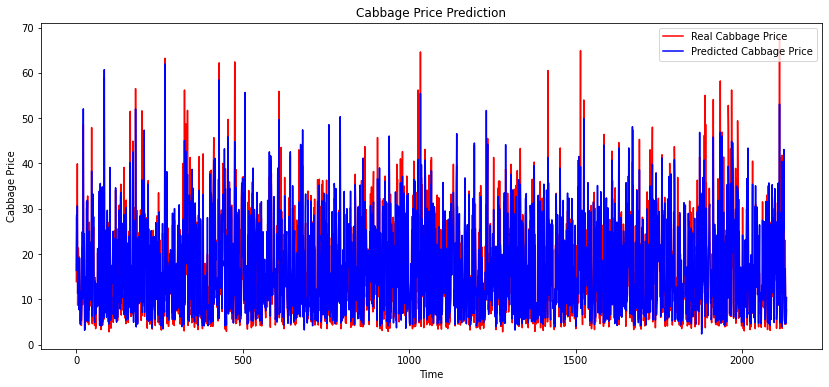

In [433]:
# Visualising the results
plt.figure(figsize=(14,6))
plt.plot(y_test, color = 'red', label = 'Real Cabbage Price')
plt.plot(pre_price, color = 'blue', label = 'Predicted Cabbage Price')
plt.title('Cabbage Price Prediction')
plt.xlabel('Time')
plt.ylabel('Cabbage Price')
plt.legend()
plt.show()

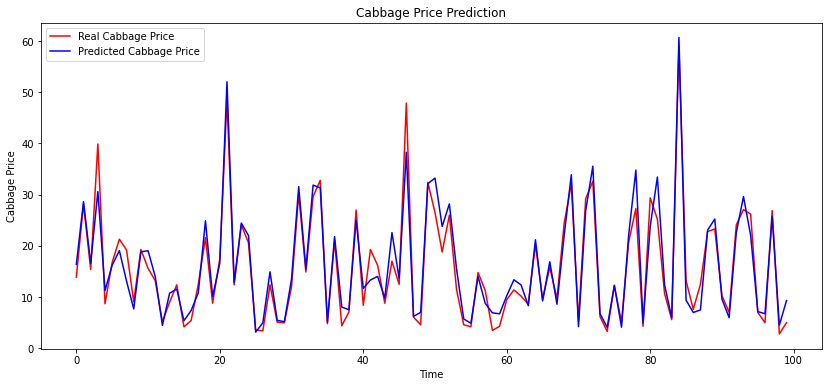

In [434]:
# Visualising the results
plt.figure(figsize=(14,6))
plt.plot(y_test[0:100], color = 'red', label = 'Real Cabbage Price')
plt.plot(pre_price[0:100], color = 'blue', label = 'Predicted Cabbage Price')
plt.title('Cabbage Price Prediction')
plt.xlabel('Time')
plt.ylabel('Cabbage Price')
plt.legend()
plt.show()

In [435]:
# MSE & RMSE 計算
# sklearn.metrics.mean_squared_error(y_true, y_pred)
# sklearn.metrics.r2_score(y_true, y_pred)
from sklearn.metrics import mean_squared_error, r2_score
MSE = mean_squared_error(y_test, pre_price)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, pre_price)
print(f"MSE value : {MSE}", f"\nRMSE value : {RMSE}", f"\nR2 score value : {R2}")

MSE value : 15.15623979337636 
RMSE value : 3.8931015647393994 
R2 score value : 0.8795839814842452
